<a href="https://colab.research.google.com/github/JorgeGuiller/MachineLearning/blob/main/hw3_gonzales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Github link:

Load Advertising.csv dataset using **pandas**

In [122]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Advertising.csv', index_col=0)

data.head()


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Standardize each column of the dataset
For each predictor 𝑥j, for 𝑗 = 0, 1, ⋯, 𝑛, compute for the standardized values:

In [123]:
import numpy
from sklearn.preprocessing import StandardScaler
# Standardize each column of the dataset
# For each predictor 𝑥j, for 𝑗 = 0, 1, ⋯, 𝑛, compute for the standardized values:

x = data[['TV', 'Radio', 'Newspaper',]]
y = data['Sales']
y_mean = numpy.mean(y)
y_std= numpy.std(y)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)


X_scaled = data_scaled[['TV', 'Radio', 'Newspaper',]]
Y_scaled = data_scaled['Sales']

# Display the scaled data
display(pd.DataFrame(data_scaled))


,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,-1.234053
196,-0.617035,-1.240003,-1.033598,-0.830548
197,0.349810,-0.942899,-1.111852,-0.234898
198,1.594565,1.265121,1.640850,2.205347


add an extra column composing of all ones to X.

In [124]:
X_scaled = numpy.c_[numpy.ones(X_scaled.shape[0]), X_scaled]
display(pd.DataFrame(X_scaled, columns=['Intercept','TV', 'Radio', 'Newspaper',]))

,Intercept,TV,Radio,Newspaper
0,1.0,0.969852,0.981522,1.778945
1,1.0,-1.197376,1.082808,0.669579
2,1.0,-1.516155,1.528463,1.783549
3,1.0,0.052050,1.217855,1.286405
4,1.0,0.394182,-0.841614,1.281802
...,...,...,...,...
195,1.0,-1.270941,-1.321031,-0.771217
196,1.0,-0.617035,-1.240003,-1.033598
197,1.0,0.349810,-0.942899,-1.111852
198,1.0,1.594565,1.265121,1.640850


Divide the dataset into training and testing, with 0.85 and 0.25 ratio, respectively

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_scaled, test_size=0.15, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

display(pd.DataFrame(X_train, columns=['Intercept','TV', 'Radio', 'Newspaper',]))
display(pd.DataFrame(X_test, columns=['Intercept','TV', 'Radio', 'Newspaper',]))
display(pd.DataFrame(y_train, ))
display(pd.DataFrame(y_test, ))


X_train shape: (170, 4)
X_test shape: (30, 4)
y_train shape: (170,)
y_test shape: (30,)


,Intercept,TV,Radio,Newspaper
0,1.0,0.616043,-1.395307,-0.430582
1,1.0,-0.908957,-0.186635,-0.564074
2,1.0,0.605534,1.764796,1.355453
3,1.0,-1.519658,1.379911,2.708788
4,1.0,1.560702,-0.632291,0.296721
...,...,...,...,...
165,1.0,-1.425075,-0.828109,-0.039311
166,1.0,0.666253,0.650657,0.711007
167,1.0,0.825059,0.691171,1.309421
168,1.0,0.216694,-0.895633,-0.596296


,Intercept,TV,Radio,Newspaper
0,1.0,0.189837,0.562876,1.028627
1,1.0,0.564665,1.650006,1.028627
2,1.0,1.703160,0.340049,0.582118
3,1.0,-1.580378,0.920751,0.674182
4,1.0,0.855419,1.737786,-1.259154
5,1.0,-0.840064,0.792457,1.019421
6,1.0,0.814550,1.393416,-0.154391
7,1.0,-1.133153,-0.787595,-0.559471
8,1.0,0.879940,-1.341288,-0.803439
9,1.0,0.327624,-0.051588,0.043546


,Sales
9,-0.657617
18,-0.523115
55,1.859486
75,-1.022693
150,0.399182
...,...
106,-1.310911
14,0.956403
92,1.033261
179,-0.273327


,Sales
95,0.552898
15,1.609697
30,1.417551
158,-1.291696
128,2.051631
115,-0.273327
69,1.590482
170,-1.080337
174,-0.484686
45,0.168607


Fit the model on the training set. Essentially, you have to optimize the model using the
training set, and not including the test set.

Initial weights: [0. 0. 0. 0.]
weights: [4.57615933e-04 7.37380039e-01 5.35689176e-01 3.85353839e-03]


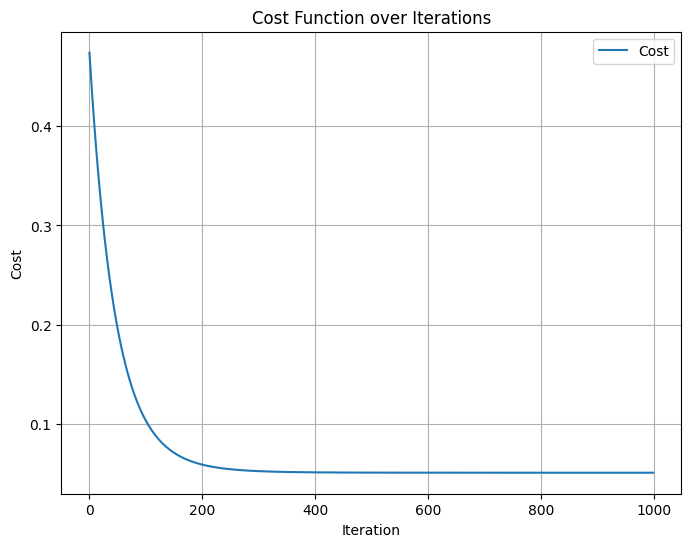

In [125]:
import matplotlib.pyplot as plt
def initialize_weights():
    return numpy.zeros(X_scaled.shape[1])

def predict(X, weights):
    return numpy.dot(X, weights)

def compute_cost(X, y, weights):
    predictions = predict(X, weights)
    return (1 / (2 * len(y))) * numpy.sum((predictions - y) ** 2)

def compute_gradient(X, y, weights):
    predictions = predict(X, weights)
    return (1 / len(y)) * numpy.dot(X.T, predictions - y)

def update_weights(weights, gradient, learning_rate):
    return weights - learning_rate * gradient

def grad_descent(X, y, weights, learning_rate, iterations):
    costs = []
    for i in range(iterations):
        gradient = compute_gradient(X, y, weights)
        weights = update_weights(weights, gradient, learning_rate)
        costs.append(compute_cost(X, y, weights))
    return weights, costs


def plot_costs(costs):
    plt.figure(figsize=(8,6))
    plt.plot(costs, label='Cost')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title('Cost Function over Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()


initial_weights = initialize_weights()
learning_rate = 0.01
iterations = 1000
weights, costs = grad_descent(X_train, y_train, initial_weights, learning_rate, iterations)

print(f"Initial weights: {initial_weights}")
print(f"weights: {weights}")

plot_costs(costs)


Predict the quantitative response y on the train set. Evaluate performance. You can use
the MSE cost function defined for the gradient descent.

In [126]:
# Predict y for the training set
train_predictions = predict(X_train, weights)

# Calculate the cost for the training set
train_cost = compute_cost(X_train, y_train, weights)
print(f"Train Cost: {train_cost}")
print(f"Train Predictions:{train_predictions}")


Train Cost: 0.05133649477733744
Train Predictions:[-0.29439471 -0.77194148  1.39757135 -0.37046584  0.81372051  1.18006125
  0.00491341  1.30004968 -0.57073104 -1.81420913 -0.83112515 -0.25098478
 -0.76942598 -1.11710849 -0.09425322 -1.64734247 -0.91866828  0.02364816
 -0.99962136 -0.45801488  0.25973897 -0.40347567 -0.25553209 -0.62932596
 -1.42314951 -0.7866359  -0.86333686  1.92100663 -1.21371145 -0.28349688
  0.71992317  0.24301197 -0.50420269 -0.62629945  0.54028591 -1.36279709
  1.417718   -1.50969857 -0.77728524 -0.47977153 -0.90017868 -1.42036106
  0.16888884  0.6264813   0.31855794  0.43921318  0.17993671  1.06774161
 -0.03323699  1.34720756 -0.29187058 -0.04158743 -0.97576329  0.57424337
 -1.07074337  0.2281829  -0.07094655  1.77075413 -0.28474882  1.69156372
 -1.41495547  0.84916205  1.77048183  0.89784199  0.60492079  0.46519731
 -0.30686702 -0.42684837  0.56292193  0.08169128 -0.15478415 -1.21603894
  0.99365296 -0.8341916   1.06052369 -0.74198769 -1.32930994  0.51340822
 

Predict the quantitative response y on the test set. Evaluate performance. Similarly, you
can use the MSE cost function defined for the gradient descent.

In [127]:
# Predict y for the test set
test_predictions = predict(X_test, weights)

# Calculate the cost for the test set
test_cost = compute_cost(X_test, y_test, weights)
print(f"Test Cost: {test_cost}")
print(f"test_predictions: {test_predictions}")


Test Cost: 0.0527113710830098
test_predictions: [ 0.44593016  1.30468409  1.44073753 -0.66904696  1.55728755 -0.19054989
  1.34693339 -1.25916904 -0.07230151  0.21457368 -0.95110184 -1.41719342
  0.0446016  -0.98284371 -0.83072352 -0.35868356 -1.02591677  0.4341739
 -0.72413413  0.92821696  1.04503024 -0.18465671 -0.32551952  1.38087445
 -1.18187242 -1.57574859  1.28713568 -0.38682636 -0.93030129 -1.05597116]


Since the data is standardized, you might be surprised that the predictions differ
from the original data. In order to revert back a standardized data into the original form,
we simply have to equate the previous equation:

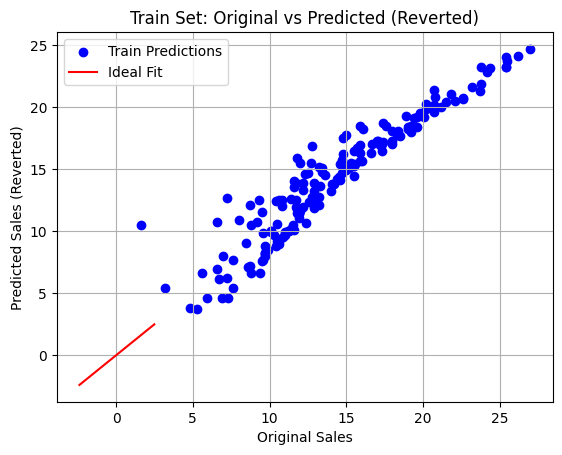

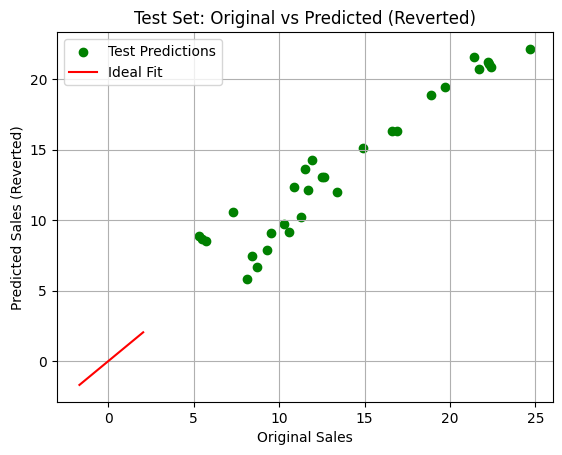

In [128]:
def reverse_standardization(predictions, scaler):
    return predictions * y_std + y_mean

train_predictions_original = reverse_standardization(train_predictions, scaler)

test_predictions_original = reverse_standardization(test_predictions, scaler)

y_train_original = reverse_standardization(y_train, scaler)

y_test_original = reverse_standardization(y_test, scaler)

# Plot for Train Set
plt.scatter(y_train_original, train_predictions_original, color='blue', label='Train Predictions')
plt.title('Train Set: Original vs Predicted (Reverted)')
plt.xlabel('Original Sales')
plt.ylabel('Predicted Sales (Reverted)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', label='Ideal Fit')
plt.legend()
plt.grid(True)
plt.show()

# Plot for Test Set
plt.scatter(y_test_original, test_predictions_original, color='green', label='Test Predictions')
plt.title('Test Set: Original vs Predicted (Reverted)')
plt.xlabel('Original Sales')
plt.ylabel('Predicted Sales (Reverted)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Fit')
plt.legend()
plt.grid(True)
plt.show()

Observe the cost results and analyse.

  The training cost has a low value of ~0.0513 indicating signs of a good model performance with low error and predicted values being close to the actal values, and the test cost is only slightly higher than the train cost implying that the generalization of the model when it comes to unseen data is working well due to lack of significant overfitting or underfitting.

**Questions**

1. What are the optimal weights found by your implemented gradient descent? Plug it into
the linear model:


image.png

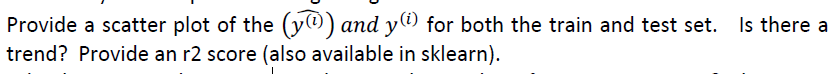

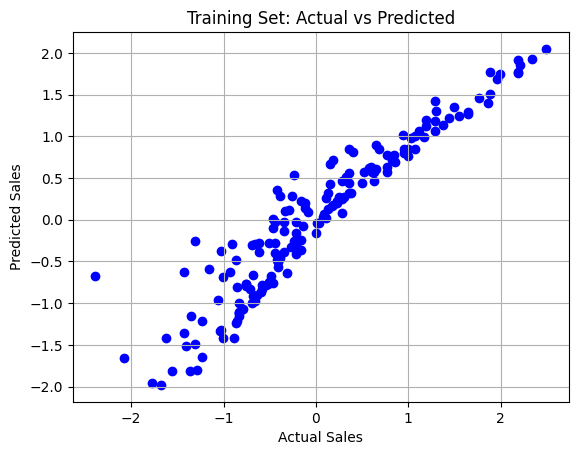

Training R² Score: 0.8936788223270575


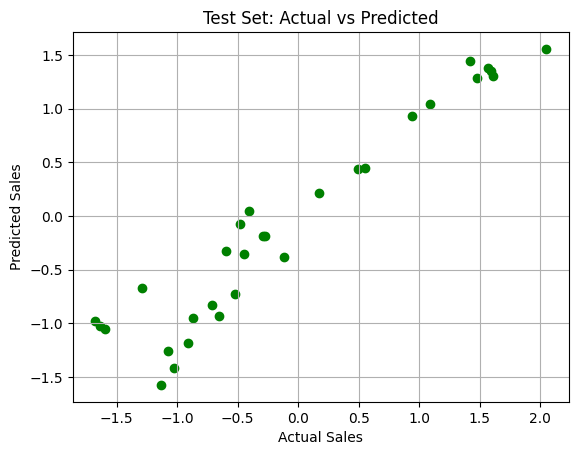

Testing R² Score: 0.9109851682212602


In [129]:
from sklearn.metrics import r2_score

# Scatter plot and R² for Training Set
def plot_train_vs_actual(y_train, train_predictions):
    plt.scatter(y_train, train_predictions, color='blue')
    plt.title('Training Set: Actual vs Predicted')
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    plt.grid(True)
    plt.show()

    train_r2 = r2_score(y_train, train_predictions)
    print(f"Training R² Score: {train_r2}")

# Scatter plot and R² for Test Set
def plot_test_vs_actual(y_test, test_predictions):
    plt.scatter(y_test, test_predictions, color='green')
    plt.title('Test Set: Actual vs Predicted')
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    plt.grid(True)
    plt.show()

    test_r2 = r2_score(y_test, test_predictions)
    print(f"Testing R² Score: {test_r2}")



# Plot the results
plot_train_vs_actual(y_train, train_predictions)
plot_test_vs_actual(y_test, test_predictions)

Both the plot from not standardized and standardized values of the actual and predicted values exhibit a y=x trend or diagonal line trend with not a lot of scatter. This means that the model is good in predicting values since it is very close to the original.


What happens to the error, r2, and cost as the number of iterations increase? Show your
data and proof. You can alternatively plot your result data for visualization and check
until 50000 iterations or more (actually).

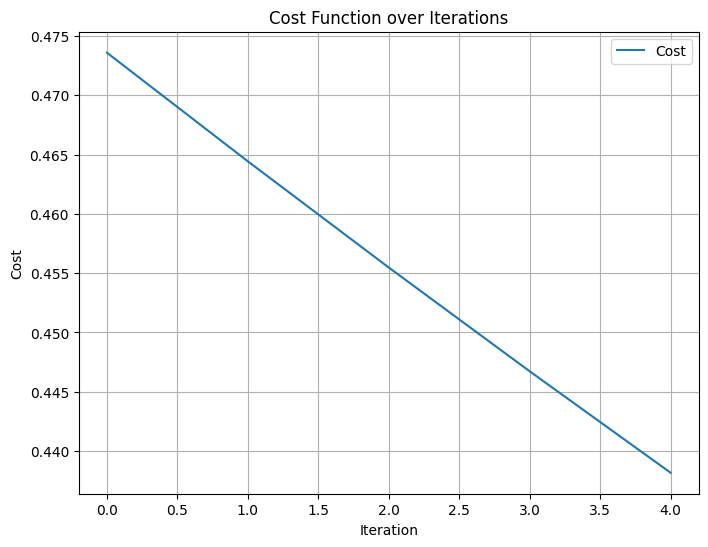

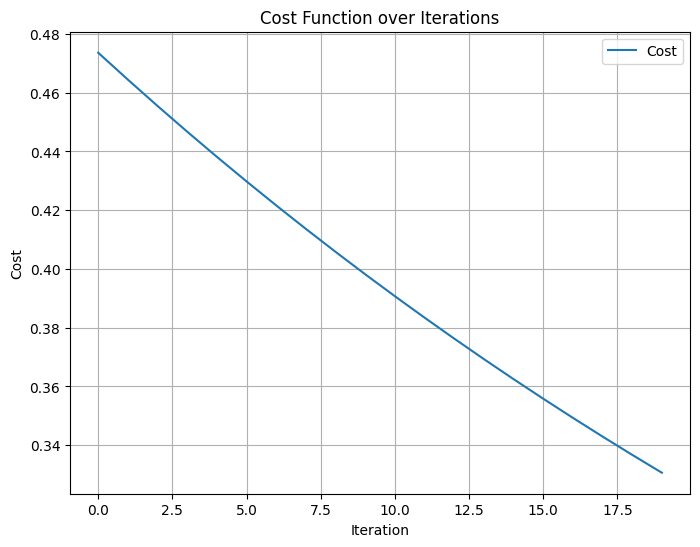

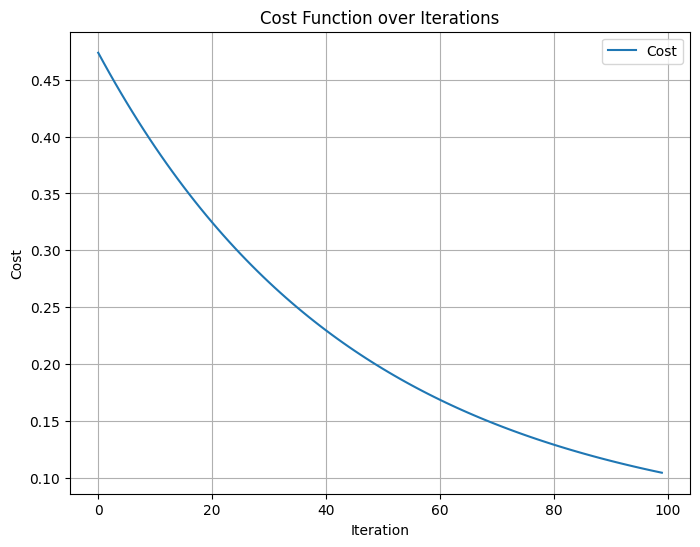

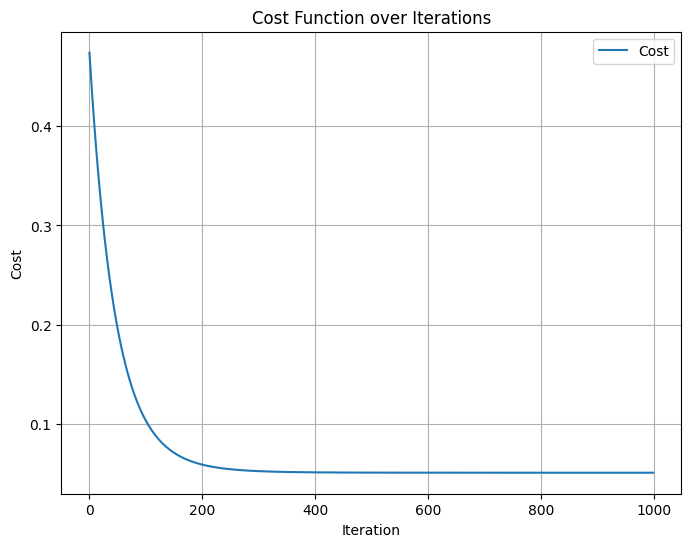

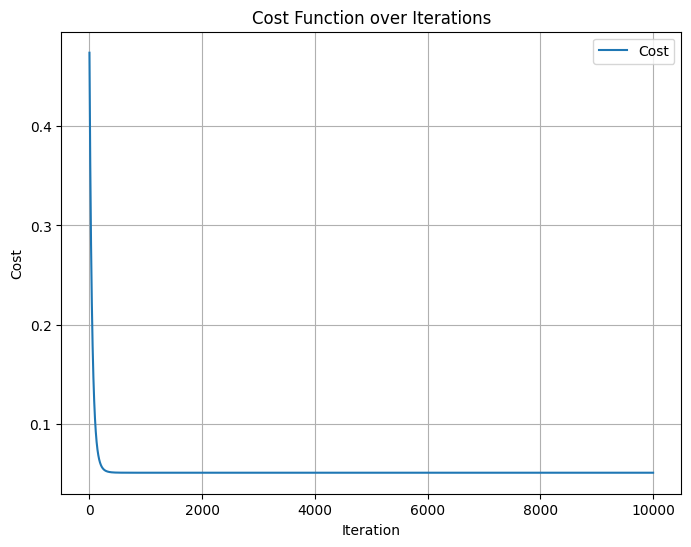

Training R² Score: 0.8936788223270575
Testing R² Score: 0.9109851682212602
Testing Cost for 5 iterations: 0.5434385260469302
Testing Cost for 20 iterations: 0.4156720148792526
Testing Cost for 100 iterations: 0.1390145232760542
Testing Cost for 1000 iterations: 0.0527113710830098
Testing Cost for 10000 iterations: 0.05268626215593753


In [133]:
#runs
weight1, cost1 = grad_descent(X_train, y_train, initial_weights, 0.01, 5)
weight2, cost2 = grad_descent(X_train, y_train, initial_weights, 0.01, 20)
weight3, cost3 = grad_descent(X_train, y_train, initial_weights, 0.01, 100)
weight4, cost4 = grad_descent(X_train, y_train, initial_weights, 0.01, 1000)
weight5, cost5 = grad_descent(X_train, y_train, initial_weights, 0.01, 10000)

#plots
plot_costs(cost1)
plot_costs(cost2)
plot_costs(cost3)
plot_costs(cost4)
plot_costs(cost5)

#results
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)
test_cost1 = compute_cost(X_test, y_test, weight1)
test_cost2 = compute_cost(X_test, y_test, weight2)
test_cost3 = compute_cost(X_test, y_test, weight3)
test_cost4 = compute_cost(X_test, y_test, weight4)
test_cost5 = compute_cost(X_test, y_test, weight5)



print(f"Training R² Score: {train_r2}")
print(f"Testing R² Score: {test_r2}")
print(f"Testing Cost for 5 iterations: {test_cost1}")
print(f"Testing Cost for 20 iterations: {test_cost2}")
print(f"Testing Cost for 100 iterations: {test_cost3}")
print(f"Testing Cost for 1000 iterations: {test_cost4}")
print(f"Testing Cost for 10000 iterations: {test_cost5}")

It can be seen that the MSE decreases as the number of iterations increases while the R2 score improves.

Once you determine the optimal number of iterations, check the effect on the cost and
error as you change the learning rate. The common learning rates in machine learning
include 0.1, 0.01, 0.001, 0.0001, 0.2 but you have the option to include others. Visualize
the cost function (vs the optimal number of iterations) of each learning rate in ONLY ONE
PLOT. Provide your analysis.

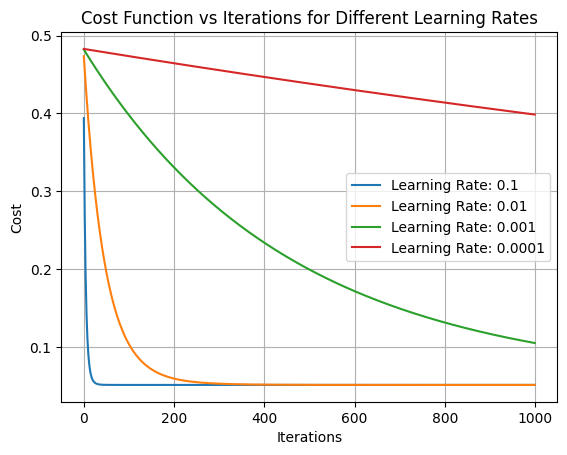

In [134]:
#It can be seen that the optimal number of iteration in the is around 350+ where the graph becomes flat and returns are very dminishing.
#lets round it up to 400

learning_rates = [0.1, 0.01, 0.001, 0.0001]
iteration_count = 1000  # Optimal number of iterations (based on earlier experimentation)
costs_by_lr = {}

# Run gradient descent for each learning rate
for lr in learning_rates:
    _, costs = grad_descent(X_train, y_train, initial_weights, learning_rate=lr, iterations=iteration_count)
    costs_by_lr[lr] = costs

# Plot cost functions for different learning rates
plt.figure()
for lr, costs in costs_by_lr.items():
    plt.plot(range(len(costs)), costs, label=f"Learning Rate: {lr}")
plt.title('Cost Function vs Iterations for Different Learning Rates')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.legend()
plt.show()

It can be seen that a very high learning rate is not optimal since the graph is not smooth and it might be due to overshooting the minimum which makes it unstable. On the other hand, a low learning rate will require more iterations to minimize the cost since it converges very slowly. In conclusion, there is a need for a proper balance in the value of the learning rate between the high and low values to have the proper speed of convergence and correct learning to the data.

Is there a relationship on the learning rate and the number of iterations?

As shown previously, there is some sort of relationship between learning rate and number of iterations. High learning rate would result in less iterations needed to minimize the cost but it can also lead to instability. On the other hand, low learning rate provides a smoother convergence and accuracy but requires a high number of iterations before it can minimize the cost.

Compare the results with the results of ordinary least squares function.

In [135]:
from sklearn.linear_model import LinearRegression
def mean_squared_error(y_true, y_pred):
    return numpy.mean((y_true - y_pred) ** 2)
# Fit OLS model using sklearn's LinearRegression
ols_model = LinearRegression()
ols_model.fit(X_train[:, 1:], y_train)  # Exclude the intercept column (first column of ones)

# Predictions on training and test sets using OLS
train_predictions_ols = ols_model.predict(X_train[:, 1:])  # Exclude intercept column
test_predictions_ols = ols_model.predict(X_test[:, 1:])

# Calculate MSE for OLS model
mse_train_ols = mean_squared_error(y_train, train_predictions_ols)
mse_test_ols = mean_squared_error(y_test, test_predictions_ols)

# Calculate R² score for OLS model
r2_train_ols = r2_score(y_train, train_predictions_ols)
r2_test_ols = r2_score(y_test, test_predictions_ols)

# Calculate MSE
mse_train = mean_squared_error(y_train, train_predictions)
mse_test = mean_squared_error(y_test, test_predictions)
# Calculate R²
r2_train = r2_score(y_train, train_predictions)
r2_test = r2_score(y_test, test_predictions)


print(f"OLS - Training MSE: {mse_train_ols}, R²: {r2_train_ols}")
print(f"OLS - Testing MSE: {mse_test_ols}, R²: {r2_test_ols}")
print(f"Gradient Descent - Training MSE: {mse_train}, R²: {r2_train}")
print(f"Gradient Descent - Testing MSE: {mse_test}, R²: {r2_test}")


OLS - Training MSE: 0.10267247181866714, R²: 0.8936793584593188
OLS - Testing MSE: 0.1053725243118761, R²: 0.9110275702091712
Gradient Descent - Training MSE: 0.1026729895546749, R²: 0.8936788223270575
Gradient Descent - Testing MSE: 0.1054227421660196, R²: 0.9109851682212602


It can be seen that the values for the MSE and R2 for the two models are very close and almost equal. This means that the gradient descent impementation has converged correctly and is approximating properly with OLS solution.